# **video_game_3Models(LinearRegression_simple__multi,xgboost_Decision tree base learner)**

**import required libraries**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import seaborn as sns
%matplotlib inline
import time
import datetime

**Check out the Data**

In [ ]:
# Load Data
df = pd.read_csv('/content/Video games sales.csv')

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# info about the  data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# describe the data:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# **visualization**

In [ ]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

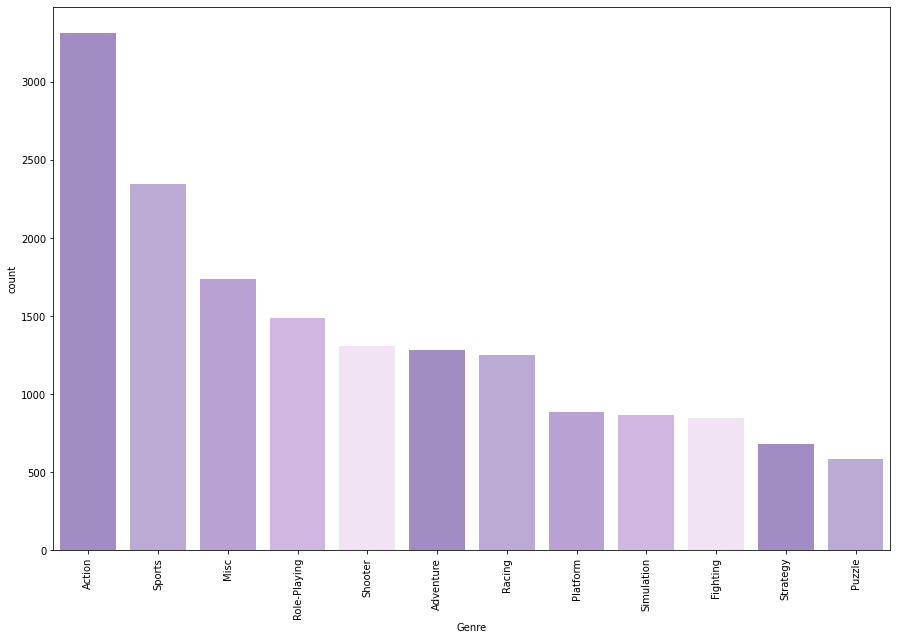

In [ ]:
#What genre games have been made the most?
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index ,palette=['#9F82CE','#baa3db','#B998DD', '#D1AFE8', '#F3E0F7'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

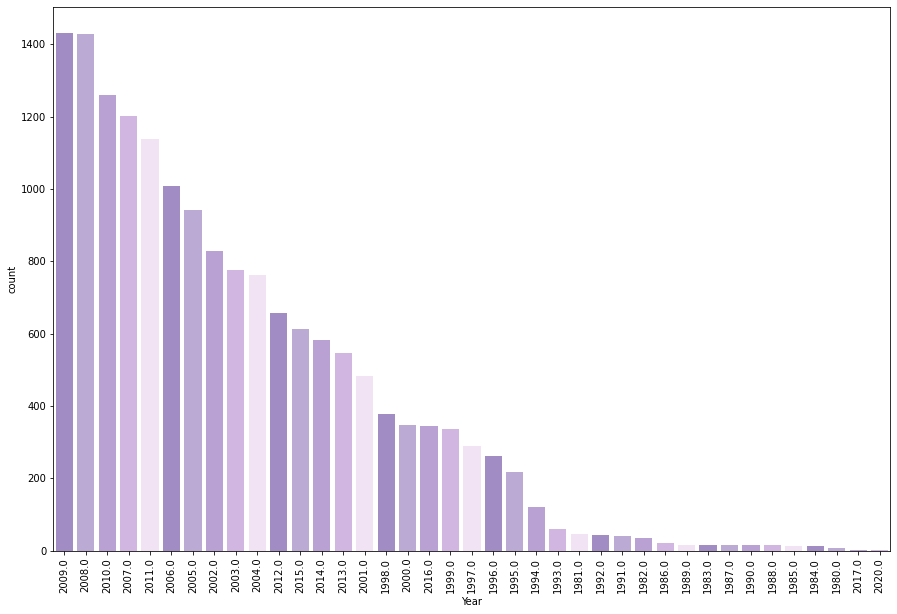

In [ ]:
#Which year had the most game release?
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index , palette=['#9F82CE','#baa3db','#B998DD', '#D1AFE8', '#F3E0F7'])
plt.xticks(rotation=90)

In [ ]:
#Which genre game have the highest sale price globally
d_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()
d_genre = df.reset_index()
d_genre = df.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

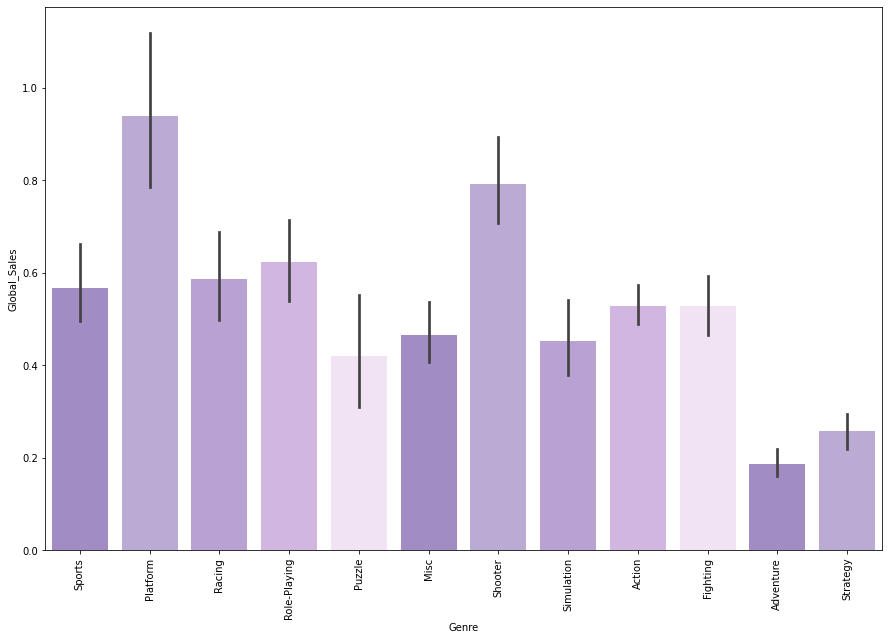

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=d_genre , palette=['#9F82CE','#baa3db','#B998DD', '#D1AFE8', '#F3E0F7'])
plt.xticks(rotation=90)

In [ ]:
#Sales compearison by genre

comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
ct = comp_map.reset_index()
ct = pd.melt(ct, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
ct.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05


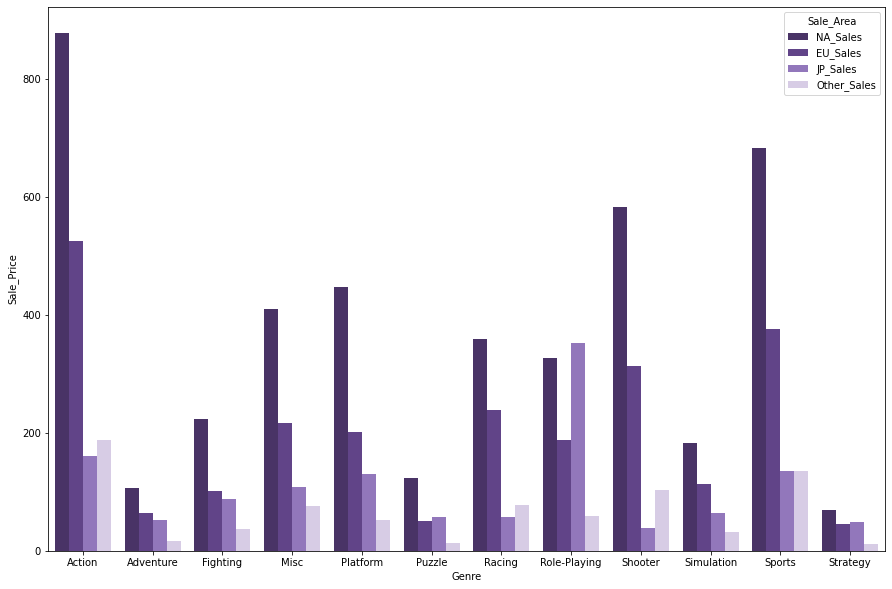

In [ ]:


plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=ct, palette=['#482a6f','#5f3993','#906cc6','#d7c8e9'] )

([<matplotlib.patches.Wedge at 0x7fbf1cb86290>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

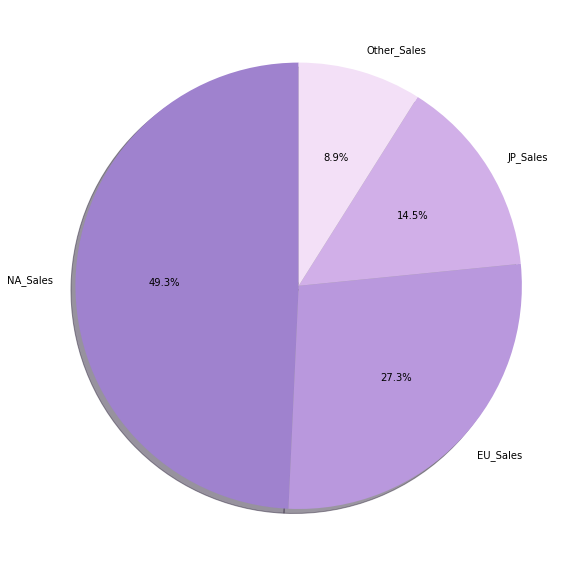

In [ ]:
#Total revenue by region
colors = ['#9F82CE','#B998DD', '#D1AFE8', '#F3E0F7']
top = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top = top.sum().reset_index()
top = top.rename(columns={"index": "region", 0: "sale"})
top
labels = top['region']
sizes = top['sale']
plt.figure(figsize=(10, 18))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90 , colors=colors)

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# checking null values in dataset
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

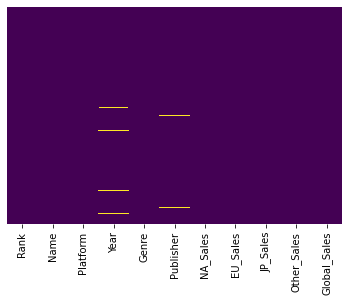

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# I prefer to delete null valuse because they represent less than or equal  1 percent of the total data.
# Deleting them or filling - will not harm the results
df = df.dropna()

In [ ]:
# checking again the null values in dataset
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

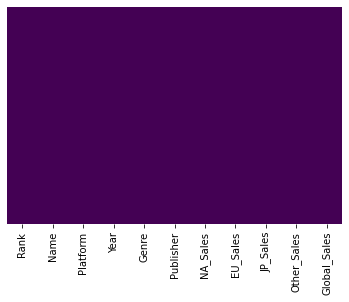

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# convert data type from float to int 
df = df.astype({"Year":'int', "NA_Sales":'int',"EU_Sales":'int',"JP_Sales":'int',"Other_Sales":'int',"Global_Sales":'int'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          16291 non-null  int64 
 1   Name          16291 non-null  object
 2   Platform      16291 non-null  object
 3   Year          16291 non-null  int64 
 4   Genre         16291 non-null  object
 5   Publisher     16291 non-null  object
 6   NA_Sales      16291 non-null  int64 
 7   EU_Sales      16291 non-null  int64 
 8   JP_Sales      16291 non-null  int64 
 9   Other_Sales   16291 non-null  int64 
 10  Global_Sales  16291 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.5+ MB


In [ ]:
print(df['Platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [ ]:
# encoding object in new col
df['cat-Platform'] = df.Platform.astype('category').cat.codes

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3,8,82,26
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6,0,40,11
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10,1,31,5


In [ ]:
print(df['cat-Platform'].unique())

[26 11  5  4 28 17 16 23  6  2 18 10 15 29 13  0 19 30  7 27  8  3 20 21
 22 25 12 24  1  9 14]


In [ ]:
print('Genre')
print(df['Genre'].unique())

# so many Publisher , we may not to use this col
print('Publisher')
print(df['Publisher'].unique())

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'M

In [ ]:
df['cat-Genre'] = df.Genre.astype('category').cat.codes

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3,8,82,26,10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6,0,40,11,4
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26,6
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26,10
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10,1,31,5,7


In [ ]:
df['cat-Publisher'] = df.Publisher.astype('category').cat.codes
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3,8,82,26,10,359
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6,0,40,11,4,359
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26,6,359
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26,10,359
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10,1,31,5,7,359


In [ ]:
df['cat-Publisher'].describe()
# there is 575 Publisher

count    16291.000000
mean       291.983365
std        176.642066
min          0.000000
25%        137.000000
50%        323.000000
75%        455.000000
max        575.000000
Name: cat-Publisher, dtype: float64

# **EDA**
# **Exploratory Data Analysis**

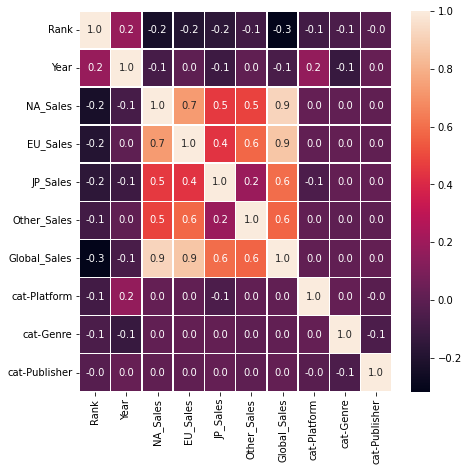

In [ ]:
#heatmap for dataset
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
# drop rank col 
df = df.drop(['Rank'], axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
0,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3,8,82,26,10,359
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6,0,40,11,4,359
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26,6,359
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26,10,359
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10,1,31,5,7,359


### **Outlires**

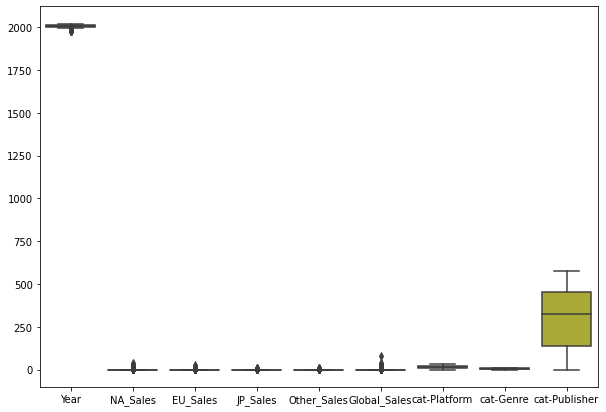

In [ ]:
# outlire df
plt.figure(figsize=(10,7))
sns.boxplot(data=df)

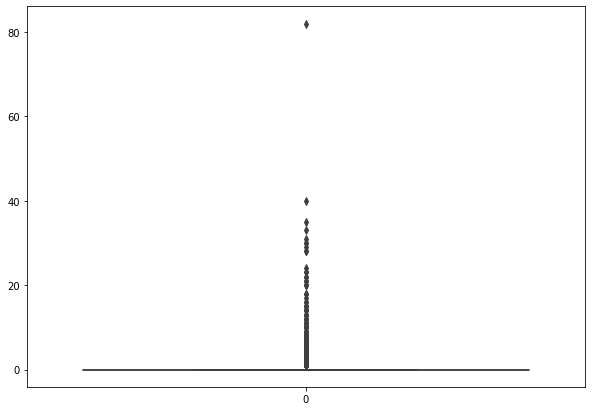

In [ ]:
# outlire Global_Sales
plt.figure(figsize=(10,7))
sns.boxplot(data=df['Global_Sales'])

In [ ]:
(df['Global_Sales']>=70 ).sum()

1

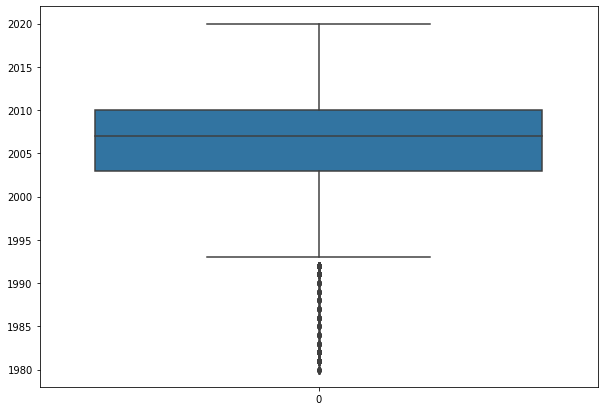

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df['Year'])

In [ ]:
(df['Year']<1990 ).sum()

205

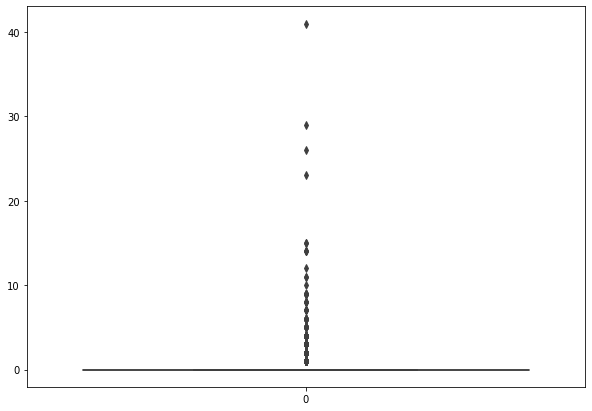

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df['NA_Sales'])

In [ ]:
(df['NA_Sales']>20).sum()

4

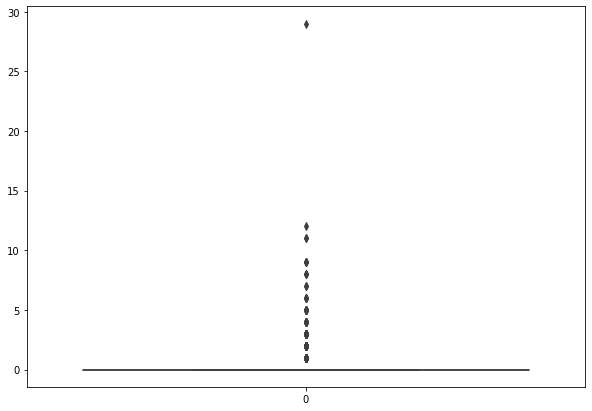

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df['EU_Sales'])

In [ ]:
(df['EU_Sales']>25).sum()

1

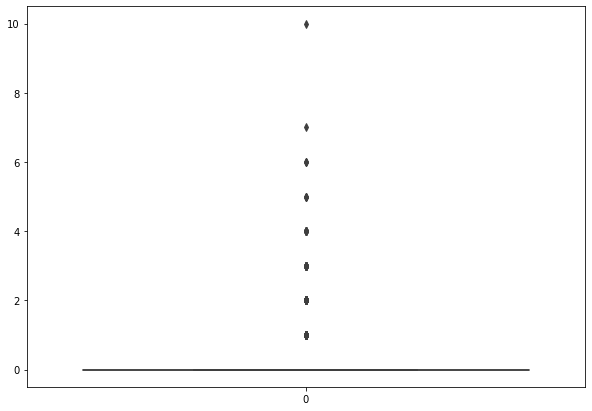

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df['JP_Sales'])

In [ ]:
(df['JP_Sales']>8).sum()

1

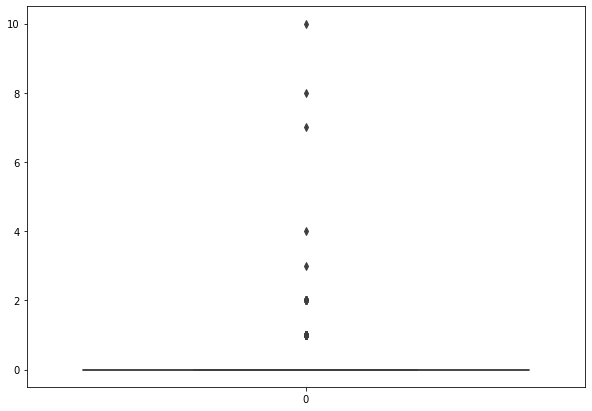

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df['Other_Sales'])

In [ ]:
(df['Other_Sales']>6).sum()

3

# **Preprocessing: Feature Engineering, Data Cleaning**

### **Drop the outliers**

In [ ]:
#Dropping the outliers 

# Global_Sales
df=df.drop(df[df['Global_Sales']>=70 ].index)

# Year
(df['Year']<1990 ).sum()
df=df.drop(df[df['Year']<1990].index)

# NA_Sales
(df['NA_Sales']>20).sum()
df=df.drop(df[df['NA_Sales']>20].index)

# EU_Sales
(df['EU_Sales']>25).sum()
df=df.drop(df[df['EU_Sales']>25 ].index)

# JP_Sales
(df['JP_Sales']>8).sum()
df=df.drop(df[df['JP_Sales']>8].index)

# Other_Sales
(df['Other_Sales']>6).sum()
df=df.drop(df[df['Other_Sales']>6 ].index)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26,6,359
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26,10,359
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11,9,6,2,30,4,4,359
7,Wii Play,Wii,2006,Misc,Nintendo,14,9,2,2,29,26,3,359
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14,7,4,2,28,26,4,359


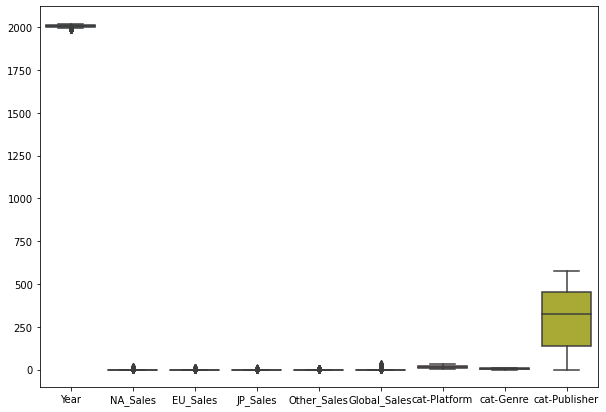

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df)

In [ ]:
# save new data 
df.to_csv('new_video_game.csv', index=False)

In [ ]:
# Load Data
df = pd.read_csv('new_video_game.csv')

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
0,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26,6,359
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26,10,359
2,New Super Mario Bros.,DS,2006,Platform,Nintendo,11,9,6,2,30,4,4,359
3,Wii Play,Wii,2006,Misc,Nintendo,14,9,2,2,29,26,3,359
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14,7,4,2,28,26,4,359


In [ ]:
df = df.drop(['Platform',], axis=1)

In [ ]:
df = df.drop(['Genre',], axis=1)

In [ ]:
df = df.drop(['Publisher',], axis=1)

In [ ]:
df.head()

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
0,Mario Kart Wii,2008,15,12,3,3,35,26,6,359
1,Wii Sports Resort,2009,15,11,3,2,33,26,10,359
2,New Super Mario Bros.,2006,11,9,6,2,30,4,4,359
3,Wii Play,2006,14,9,2,2,29,26,3,359
4,New Super Mario Bros. Wii,2009,14,7,4,2,28,26,4,359


# **Building a Linear Regression model**

### **simple**

In [ ]:
# Split the data
train, test = train_test_split(
    df,
    test_size=0.2,
    train_size = 0.8,
    random_state = 42
)

In [ ]:
# Create my X, y data

target = "Global_Sales"
features = "NA_Sales"

X_train = train[[features]]
y_train = train[[target]]

X_test = test[[features]]
y_test = test[[target]]

In [ ]:
# Create a model object
gm = LinearRegression()

# Train the model
gm.fit(X_train, y_train)

LinearRegression()

In [ ]:
df.corr()
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
Year,1.000000,-0.040653,0.008313,-0.063438,0.026574,-0.031871,0.110997,-0.151918,0.006631
NA_Sales,-0.040653,1.000000,0.749390,0.428234,0.511214,0.910252,0.042734,0.011392,0.008936
EU_Sales,0.008313,0.749390,1.000000,0.438596,0.671199,0.876340,0.015536,0.015617,0.007378
JP_Sales,-0.063438,0.428234,0.438596,1.000000,0.223299,0.582739,-0.047352,0.020199,0.022728
Other_Sales,0.026574,0.511214,0.671199,0.223299,1.000000,0.602350,0.014325,0.006488,-0.005648
Global_Sales,-0.031871,0.910252,0.876340,0.582739,0.602350,1.000000,0.027341,0.012592,0.016094
cat-Platform,0.110997,0.042734,0.015536,-0.047352,0.014325,0.027341,1.000000,0.022175,-0.030055
cat-Genre,-0.151918,0.011392,0.015617,0.020199,0.006488,0.012592,0.022175,1.000000,-0.052703
cat-Publisher,0.006631,0.008936,0.007378,0.022728,-0.005648,0.016094,-0.030055,-0.052703,1.000000


In [ ]:
gm.fit(pd.DataFrame(X_train), y_train)

LinearRegression()

In [ ]:
gm.intercept_

array([0.08422241])

In [ ]:
gm.coef_

array([[2.00627407]])

In [ ]:
predictions = gm.predict(pd.DataFrame(X_test))

predictions

array([[0.08422241],
       [0.08422241],
       [2.09049648],
       ...,
       [0.08422241],
       [0.08422241],
       [0.08422241]])

In [ ]:

r2_score(y_true=y_test, y_pred=predictions)

0.8513438991913049

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

0.2125363539133119

In [ ]:
# Score the Model using cross validation

cross_val_score(
    gm, #model
    X_train, 
    y_train, 
    cv=5, 
    scoring="neg_mean_absolute_error" # scoring metric to use 
).mean()

-0.21067692024743678

In [ ]:
predictions = gm.predict(pd.DataFrame(X_test))

predictions

array([[0.08422241],
       [0.08422241],
       [2.09049648],
       ...,
       [0.08422241],
       [0.08422241],
       [0.08422241]])

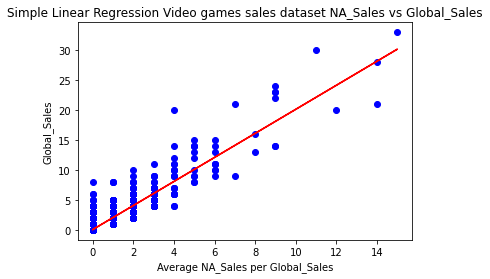

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_test, predictions, color = 'red')
plt.title('Simple Linear Regression Video games sales dataset NA_Sales vs Global_Sales')
plt.xlabel('Average NA_Sales per Global_Sales')
plt.ylabel('Global_Sales')
plt.show()

### **multi**

In [ ]:
# Create my X, y data

target = "Global_Sales"
features = ['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','cat-Platform','cat-Genre','cat-Publisher']

X_train = train[features]
y_train = train[[target]]

X_test = test[features]
y_test = test[[target]]

In [ ]:


# Create a model object
multi_gm= LinearRegression()

# Train the model
multi_gm.fit(X_train, y_train)

LinearRegression()

In [ ]:
multi_gm.intercept_

array([2.58568975])

In [ ]:
multi_gm.coef_

array([[-1.25921832e-03,  1.18262168e+00,  1.19350189e+00,
         1.02981862e+00,  5.76697402e-01,  1.02161469e-03,
        -1.10817281e-03,  3.42727448e-05]])

In [ ]:
multi_predictions = multi_gm.predict(X_test)

In [ ]:
r2_score(y_true=y_test, y_pred=multi_predictions)

0.9519540857305402

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=multi_predictions)

0.1591725296429255

# **Regression using XGBoost model**

**Decision tree base learner**

In [ ]:
# Selecting the feature set
df_train = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

df_train

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,15,12,3,3
1,15,11,3,2
2,11,9,6,2
3,14,9,2,2
4,14,7,4,2
...,...,...,...,...
16077,0,0,0,0
16078,0,0,0,0
16079,0,0,0,0
16080,0,0,0,0


In [ ]:
X = df_train.values

# the target will be the Global_Sales 
y = df['Global_Sales'].values

In [ ]:
# splitting the model 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_reg = xgb.XGBRegressor(objective = "reg:linear",
                           n_estimators = 75,
                           subsample = 0.75,
                           max_depth = 7)


In [ ]:
xgb_reg.fit(X_train, y_train)

[00:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_estimators=75, subsample=0.75)

In [ ]:
# Making Predictions
predictions = xgb_reg.predict(X_test)

In [ ]:
# To convert data table into a matrix

kc_dmatrix = xgb.DMatrix(data=X, label=y, feature_names=df_train)

In [ ]:
kc_dmatrix

In [ ]:
# Create the parameter dictionary: params
params = {"objective": "reg:linear", "max_depth": 2}

In [ ]:
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=kc_dmatrix, num_boost_round=10)

[00:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Computing RMSE
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, predictions))))

RMSE: 0.302012


In [ ]:
# Computing MAE
print("MAE: %f" % (mean_absolute_error(y_test, predictions)))

MAE: 0.143691


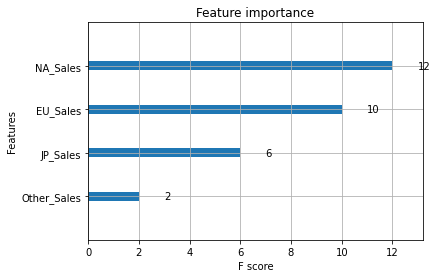

In [ ]:
xgb.plot_importance(xg_reg)

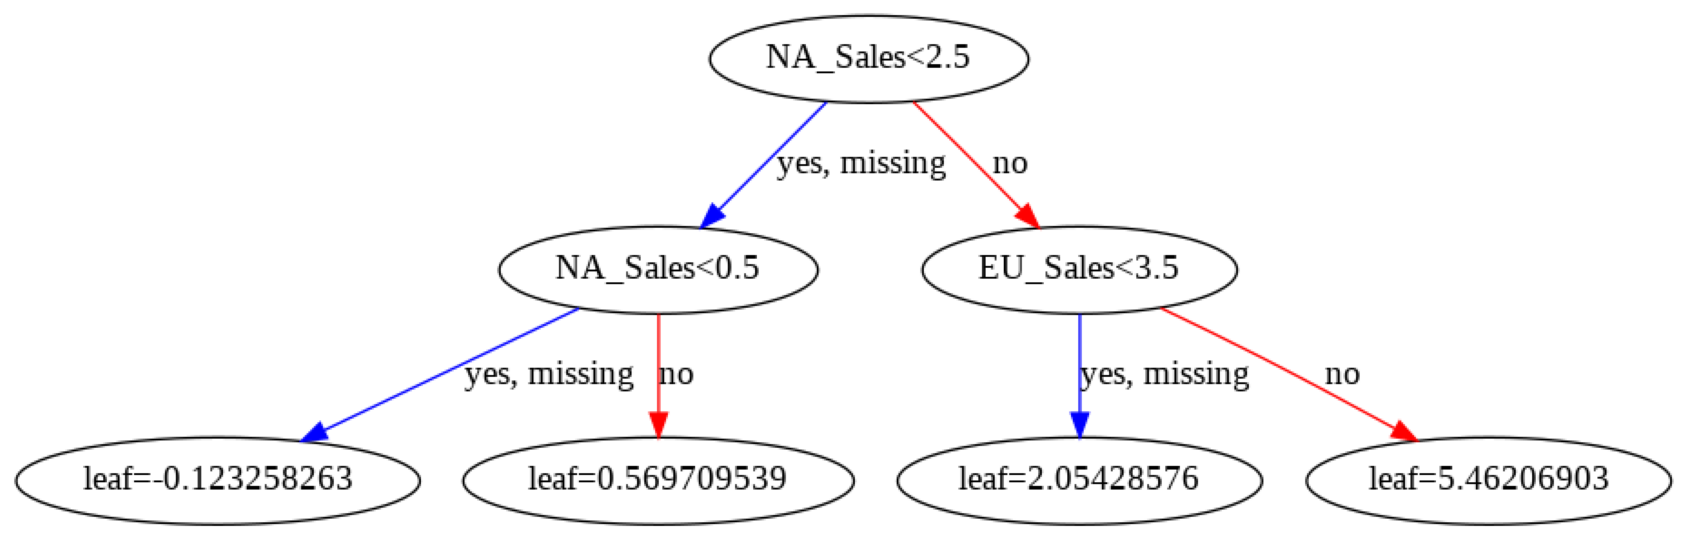

In [ ]:
# Plot the first tree as num_trees = 0 and features importance
# Note: num_trees is equal to the num_boost_round we defined in xgb.train

# Note: we must install 
# conda install graphviz python-graphviz

_, ax = plt.subplots(figsize=(30,30)) # Resize figure

xgb.plot_tree(xg_reg, num_trees=0, ax= ax)

plt.show()

# **Classification**

# Classification Models: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Add column True if ther is a seles for this game , and false of not 
df['Sales'] = True
for i in df.index:
  if df['Global_Sales'][i] == 0:
    df['Sales'][i] = False 

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher,Sales
0,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35,26,6,359,True
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33,26,10,359,True
2,New Super Mario Bros.,DS,2006,Platform,Nintendo,11,9,6,2,30,4,4,359,True
3,Wii Play,Wii,2006,Misc,Nintendo,14,9,2,2,29,26,3,359,True
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14,7,4,2,28,26,4,359,True


In [ ]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].values
y = df['Sales'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
classifier = LogisticRegression(random_state = 42)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)

print(y_pred)

[False False  True ...  True False False]


In [ ]:
test_dataset = pd.DataFrame()
test_dataset['Actual_Purchased'] = y_test
test_dataset['Predict_Purchased'] = y_pred

test_dataset

,Actual_Purchased,Predict_Purchased
0,False,False
1,False,False
2,True,True
3,False,False
4,False,False
...,...,...
4016,False,False
4017,False,False
4018,True,True
4019,False,False


In [ ]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts(normalize = True)

True     0.951007
False    0.048993
dtype: float64

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[3549,    0],
       [ 197,  275]])

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['True', 'False']))


Classification Report

              precision    recall  f1-score   support

        True       0.95      1.00      0.97      3549
       False       1.00      0.58      0.74       472

    accuracy                           0.95      4021
   macro avg       0.97      0.79      0.85      4021
weighted avg       0.95      0.95      0.95      4021



# CART (Decision Tree Classfication Model Using Gini Index)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
df = pd.read_csv('/content/new_video_game.csv')

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat-Platform,cat-Genre,cat-Publisher
count,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000
mean,2006.693011,0.094702,0.048812,0.020395,0.005907,0.273847,15.957841,4.937197,292.975874
std,5.275351,0.563529,0.384279,0.222108,0.094115,1.248293,8.302485,3.764527,176.624781
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,137.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000,323.000000
75%,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,8.000000,455.000000
max,2020.000000,15.000000,12.000000,7.000000,4.000000,35.000000,30.000000,11.000000,575.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16082 entries, 0 to 16081
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           16082 non-null  object
 1   Platform       16082 non-null  object
 2   Year           16082 non-null  int64 
 3   Genre          16082 non-null  object
 4   Publisher      16082 non-null  object
 5   NA_Sales       16082 non-null  int64 
 6   EU_Sales       16082 non-null  int64 
 7   JP_Sales       16082 non-null  int64 
 8   Other_Sales    16082 non-null  int64 
 9   Global_Sales   16082 non-null  int64 
 10  cat-Platform   16082 non-null  int64 
 11  cat-Genre      16082 non-null  int64 
 12  cat-Publisher  16082 non-null  int64 
 13  Sales          16082 non-null  bool  
dtypes: bool(1), int64(9), object(4)
memory usage: 1.6+ MB


In [ ]:
df.shape

(16082, 14)

In [ ]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].values
y = df['Sales'].values

In [ ]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(12865, 4)
(3217, 4)


In [ ]:
#  class_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3, class_weight='None',,random_state=0)
class_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=4)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
class_tree.fit(X_train_sc, y_train)

preds_class = class_tree.predict(X_test_sc)

In [ ]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

In [ ]:
print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 95.0%
Test Set Accuracy: 95.0%


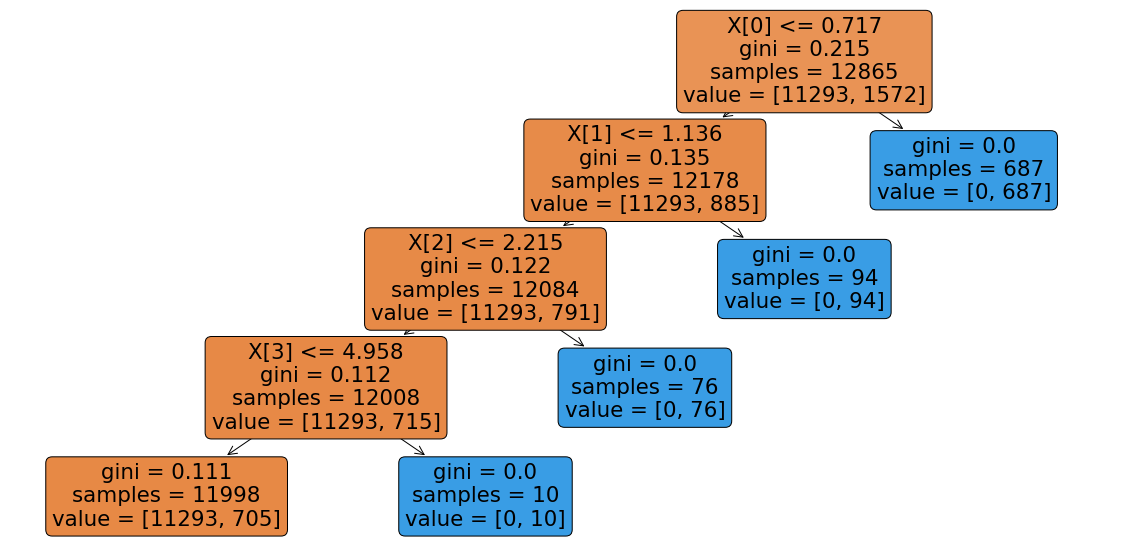

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))

tree.plot_tree(
    class_tree, 
    filled=True,
    rounded=True,
);

In [ ]:
# Printing the classification report
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97      2831
        True       1.00      0.55      0.71       386

    accuracy                           0.95      3217
   macro avg       0.97      0.78      0.84      3217
weighted avg       0.95      0.95      0.94      3217



#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16082 entries, 0 to 16081
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           16082 non-null  object
 1   Platform       16082 non-null  object
 2   Year           16082 non-null  int64 
 3   Genre          16082 non-null  object
 4   Publisher      16082 non-null  object
 5   NA_Sales       16082 non-null  int64 
 6   EU_Sales       16082 non-null  int64 
 7   JP_Sales       16082 non-null  int64 
 8   Other_Sales    16082 non-null  int64 
 9   Global_Sales   16082 non-null  int64 
 10  cat-Platform   16082 non-null  int64 
 11  cat-Genre      16082 non-null  int64 
 12  cat-Publisher  16082 non-null  int64 
 13  Sales          16082 non-null  bool  
dtypes: bool(1), int64(9), object(4)
memory usage: 1.6+ MB


In [ ]:
X = df[['cat-Platform','Global_Sales']].values

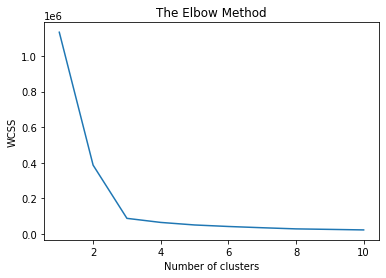

In [ ]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [ ]:
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[0 0 2 ... 1 2 2]


In [ ]:
kmeans.cluster_centers_

array([[27.30139771,  0.35527319],
       [16.50739683,  0.25447703],
       [ 4.9531637 ,  0.23530736]])

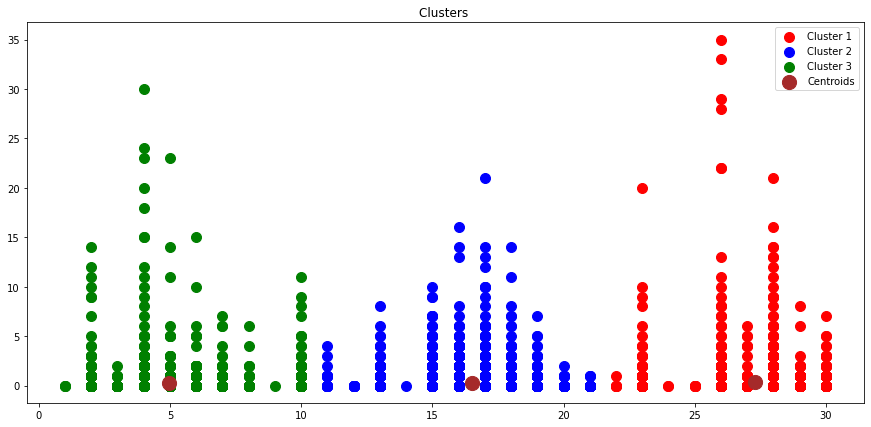

In [ ]:
plt.figure(figsize=(15, 7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')

# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'cyan', label = 'Cluster 6')

# plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'lime', label = 'Cluster 7')

# plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'olive', label = 'Cluster 8')

# plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'navy', label = 'Cluster 9')

# plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = 'gold', label = 'Cluster 10')

# plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = 'deeppink', label = 'Cluster 11')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

# Pipline


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales'].values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [ ]:
# Only use numerical features

X_train_n = X_train.select_dtypes(exclude=["category", "object"])
X_test_n = X_test.select_dtypes(exclude=["category", "object"])

# Create a Pipeline for our model
pipe = make_pipeline(
    
    SimpleImputer(), 
    StandardScaler(),
   DecisionTreeClassifier()
)

pipe.fit(X_train_n,y_train)
pipe.score(X_test_n, y_test)

1.0

In [ ]:
numeric_features = X_train.describe().columns 

numeric_features

categorical_features = X_train.describe(exclude="number").columns

categorical_features

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [ ]:
# Create a transformer for numeric columns
numeric_transformer = Pipeline(
    steps=[
        
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

# Create Transformer for categorical data

categorical_transformer = Pipeline(
    steps=[
        # most_frequent --> mode
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) ]
)

# Create a preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]
)

clf.fit(X_train, y_train)

print(f"model score: {clf.score(X_test, y_test)}")

model score: 1.0
